In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
books=pd.read_csv('BX-Books.csv' , sep=';',error_bad_lines=False , encoding="latin-1")
books.columns=['ISBN','bookTitle','bookAuthor','yearOfPublication','publisher','imageUrlS','imageUrlM','imageUrlL']
ratings=pd.read_csv('BX-Book-Ratings.csv', sep=';',error_bad_lines=False , encoding="latin-1")
ratings.columns=['userID','ISBN','bookRating']
users=pd.read_csv('BX-Users.csv', sep=';',error_bad_lines=False , encoding="latin-1")
users.columns=['userID','Location','Age']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [19]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


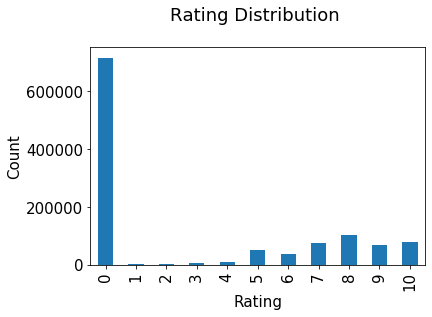

In [20]:
plt.rc("font",size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution \n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [21]:
print(books.shape)
print(list(books.columns))

(271360, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


In [22]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['userID', 'Location', 'Age']


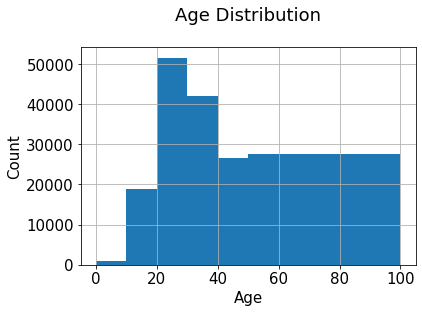

In [23]:
users.Age.hist(bins=[0,10,20,30,40,50,100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [24]:
#users with less than 200 ratings and books with less than 100 ratings are execluded

In [25]:
counts1=ratings['userID'].value_counts()
ratings=ratings[ratings['userID'].isin(counts1[counts1>=200].index)]
counts=ratings['bookRating'].value_counts()
ratings=ratings[ratings['bookRating'].isin(counts[counts>=100].index)]

In [26]:
#collabarative filtering using k-nearest neighbours(knn)
#used to find clusters of similar users based on common book ratings

In [27]:
combine_book_rating=pd.merge(ratings,books, on='ISBN')
columns=['yearOfPublication','publisher','bookAuthor','imageUrlS','imageUrlS','imageUrlM','imageUrlL']
combine_book_rating=combine_book_rating.drop(columns,axis=1)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [28]:
 #we then group by book titles and create a new column for total rating count

In [32]:
combine_book_rating=combine_book_rating.dropna(axis=0,subset=['bookTitle'])
book_ratingCount=(combine_book_rating.groupby(by=['bookTitle'])['bookRating'].count().reset_index().rename(columns={'bookRating':'totalRatingCount'})[['bookTitle','totalRatingCount']])                 
book_ratingCount.head()                

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [33]:
#we combine the rating data with total rating count data

In [38]:
rating_with_totalRatingCount=combine_book_rating.merge(book_ratingCount,left_on='bookTitle',right_on='bookTitle',how='left')
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [41]:
popularity_threshold=50
rating_popular_book=rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.tail()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
487016,269566,0670809381,0,Echoes,54
487544,271284,0440910927,0,The Rainmaker,180
487796,271705,B0001PIOX4,0,Fahrenheit 451,119
488402,274808,0449701913,0,Homecoming,61
488715,275970,1586210661,9,Me Talk Pretty One Day,146


In [40]:
rating_popular_book.shape

(62149, 5)

In [42]:
#Filter to users in us and canada only


In [44]:
combined=rating_popular_book.merge(users,left_on='userID',right_on='userID',how='left')
us_canada_user_rating=combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age',axis=1)
us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa"
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"knoxville, tennessee, usa"
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"byron, minnesota, usa"
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"cordova, tennessee, usa"
5,16795,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"mechanicsville, maryland, usa"


In [45]:
#cosine similarity

In [58]:
from scipy.sparse import csr_matrix
us_canada_user_rating=us_canada_user_rating.drop_duplicates(['userID','bookTitle'])
us_canada_user_rating_pivot=us_canada_user_rating.pivot(index='bookTitle',columns='userID',values='bookRating').fillna(0)
us_canada_user_rating_matrix=csr_matrix(us_canada_user_rating_pivot.values)


In [59]:
us_canada_user_rating_pivot.head()

userID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,271448,271705,273979,274061,274308,274808,275970,277427,277639,278418
bookTitle,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0


In [63]:
from sklearn.neighbors import NearestNeighbors
model_knn=NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [82]:

query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

45


In [83]:
us_canada_user_rating_pivot.index[query_index]

'Along Came a Spider (Alex Cross Novels)'

In [84]:

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Along Came a Spider (Alex Cross Novels):

1: Kiss the Girls, with distance of 0.6971225155936305:
2: When the Wind Blows, with distance of 0.7256562637971147:
3: 1st to Die: A Novel, with distance of 0.730085036592391:
4: The Client, with distance of 0.734248779458267:
5: Tell Me Your Dreams, with distance of 0.7410382842720454:
